In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7130ff2caeb6d2724a6cefcb729b6590


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | hit
Processing Record 5 of Set 1 | hambantota
Processing Record 6 of Set 1 | kailua
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | zyryanka
Processing Record 9 of Set 1 | juifang
City not found. Skipping...
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | husavik
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | magdagachi
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | oktyabrskoye
Processing Record 19 of Set 1 | ponta delgada
Processing Record 20 of Set 1 | tumut
Processing Record 21 of Set 1 | hilo
Processing Rec

Processing Record 40 of Set 4 | maxixe
Processing Record 41 of Set 4 | ola
Processing Record 42 of Set 4 | marfino
Processing Record 43 of Set 4 | lander
Processing Record 44 of Set 4 | sola
Processing Record 45 of Set 4 | hede
Processing Record 46 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 4 | kahului
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | margate
Processing Record 50 of Set 4 | cabedelo
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | mayma
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | aakirkeby
City not found. Skipping...
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | sept-iles
Processing Record 7 of Set 5 | santa maria
Processing Record 8 of Set 5 | tiznit
Processing Record 9 of Set 5 | huron
Processing Record 10 of Set 5 | narsaq
Processing Record 11 of Set 5 | hamilton
Processing Record 12 of Set 5 | minggang
Processing Record 13 of Set 5 | sai

Processing Record 32 of Set 8 | benjamin aceval
Processing Record 33 of Set 8 | necochea
Processing Record 34 of Set 8 | pokaran
Processing Record 35 of Set 8 | hualmay
Processing Record 36 of Set 8 | arman
Processing Record 37 of Set 8 | rio piracicaba
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | sarapul
Processing Record 40 of Set 8 | porbandar
Processing Record 41 of Set 8 | shipunovo
Processing Record 42 of Set 8 | najran
Processing Record 43 of Set 8 | fare
Processing Record 44 of Set 8 | talara
Processing Record 45 of Set 8 | kyra
Processing Record 46 of Set 8 | ambon
Processing Record 47 of Set 8 | glace bay
Processing Record 48 of Set 8 | kuusamo
Processing Record 49 of Set 8 | mnogovershinnyy
Processing Record 50 of Set 8 | chapais
Processing Record 1 of Set 9 | dunedin
Processing Record 2 of Set 9 | caluquembe
Processing Record 3 of Set 9 | businga
Processing Record 4 of Set 9 | maarianhamina
Processing Record 5 of Set 9 | casper
Processing Re

Processing Record 19 of Set 12 | abtenau
Processing Record 20 of Set 12 | bhadrachalam
Processing Record 21 of Set 12 | japura
Processing Record 22 of Set 12 | kefamenanu
Processing Record 23 of Set 12 | la reforma
Processing Record 24 of Set 12 | antalaha
Processing Record 25 of Set 12 | lagunas
Processing Record 26 of Set 12 | yibin
Processing Record 27 of Set 12 | naze
Processing Record 28 of Set 12 | kaeo
Processing Record 29 of Set 12 | rock springs
Processing Record 30 of Set 12 | suzu
City not found. Skipping...
Processing Record 31 of Set 12 | korla
Processing Record 32 of Set 12 | stettler
Processing Record 33 of Set 12 | teluknaga
Processing Record 34 of Set 12 | camocim
Processing Record 35 of Set 12 | christiana
Processing Record 36 of Set 12 | sawtell
Processing Record 37 of Set 12 | mogadishu
Processing Record 38 of Set 12 | cuamba
Processing Record 39 of Set 12 | zhicheng
Processing Record 40 of Set 12 | dukat
Processing Record 41 of Set 12 | opuwo
Processing Record 42 o

In [10]:
len(city_data)

566

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuatapere,-46.1333,167.6833,59.00,73,62,5.99,NZ,2021-04-18 01:22:22
1,Punta Arenas,-53.1500,-70.9167,53.01,76,75,6.91,CL,2021-04-18 01:22:22
2,Bredasdorp,-34.5322,20.0403,46.40,93,0,4.61,ZA,2021-04-18 01:19:09
3,Hit,33.6416,42.8251,75.97,19,0,6.73,IQ,2021-04-18 01:18:05
4,Hambantota,6.1241,81.1185,77.00,100,40,3.44,LK,2021-04-18 01:22:23
5,Kailua,21.4022,-157.7394,82.40,64,75,12.66,US,2021-04-18 01:22:24
6,Butaritari,3.0707,172.7902,82.29,77,98,9.04,KI,2021-04-18 01:19:28
7,Zyryanka,65.7500,150.8500,34.54,79,100,17.02,RU,2021-04-18 01:22:24
8,Vila Franca Do Campo,37.7167,-25.4333,62.60,100,75,6.91,PT,2021-04-18 01:22:25
9,Bluff,-46.6000,168.3333,59.00,73,90,5.99,NZ,2021-04-18 01:22:27


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuatapere,NZ,2021-04-18 01:22:22,-46.1333,167.6833,59.00,73,62,5.99
1,Punta Arenas,CL,2021-04-18 01:22:22,-53.1500,-70.9167,53.01,76,75,6.91
2,Bredasdorp,ZA,2021-04-18 01:19:09,-34.5322,20.0403,46.40,93,0,4.61
3,Hit,IQ,2021-04-18 01:18:05,33.6416,42.8251,75.97,19,0,6.73
4,Hambantota,LK,2021-04-18 01:22:23,6.1241,81.1185,77.00,100,40,3.44
5,Kailua,US,2021-04-18 01:22:24,21.4022,-157.7394,82.40,64,75,12.66
6,Butaritari,KI,2021-04-18 01:19:28,3.0707,172.7902,82.29,77,98,9.04
7,Zyryanka,RU,2021-04-18 01:22:24,65.7500,150.8500,34.54,79,100,17.02
8,Vila Franca Do Campo,PT,2021-04-18 01:22:25,37.7167,-25.4333,62.60,100,75,6.91
9,Bluff,NZ,2021-04-18 01:22:27,-46.6000,168.3333,59.00,73,90,5.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

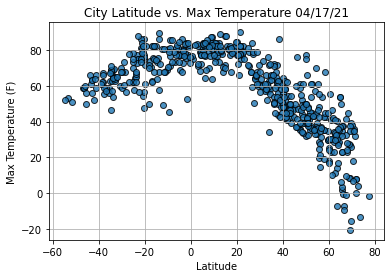

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

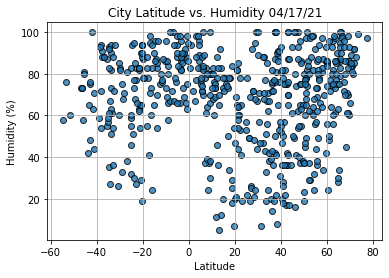

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

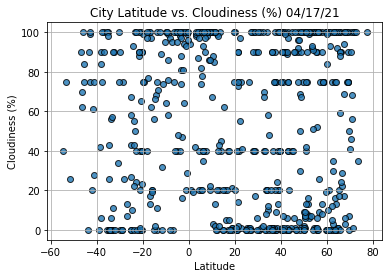

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

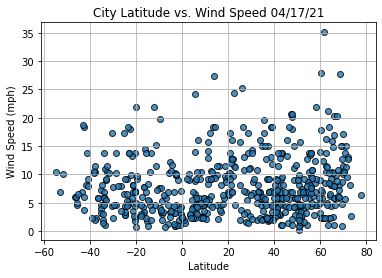

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Magdagachi
Country                        RU
Date          2021-04-18 01:22:29
Lat                         53.45
Lng                         125.8
Max Temp                    43.21
Humidity                       61
Cloudiness                     92
Wind Speed                   6.73
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0.

0      False
1      False
2      False
3       True
4       True
       ...  
561     True
562    False
563    False
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Hit,IQ,2021-04-18 01:18:05,33.6416,42.8251,75.97,19,0,6.73
4,Hambantota,LK,2021-04-18 01:22:23,6.1241,81.1185,77.00,100,40,3.44
5,Kailua,US,2021-04-18 01:22:24,21.4022,-157.7394,82.40,64,75,12.66
6,Butaritari,KI,2021-04-18 01:19:28,3.0707,172.7902,82.29,77,98,9.04
7,Zyryanka,RU,2021-04-18 01:22:24,65.7500,150.8500,34.54,79,100,17.02


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

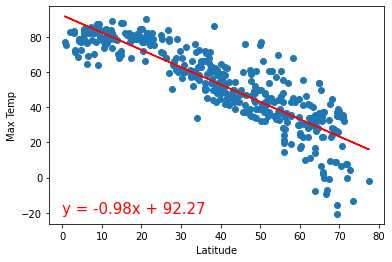

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp",(0,-20))


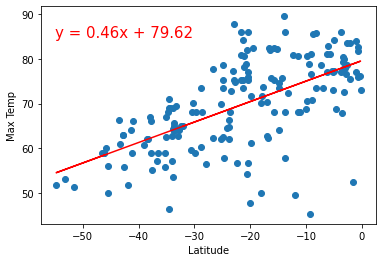

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,85))


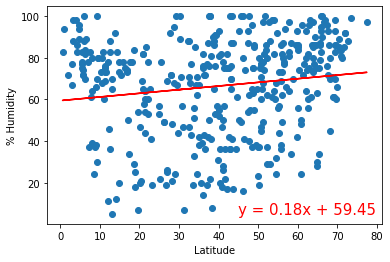

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,5))

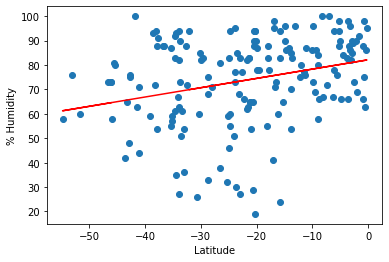

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-57,8))

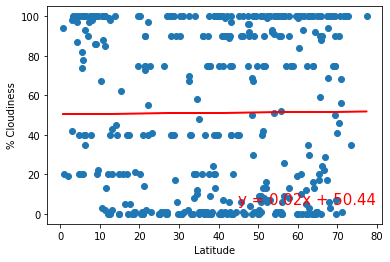

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,5))

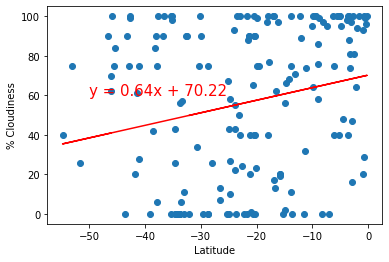

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

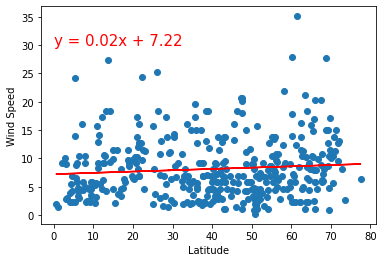

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,30))


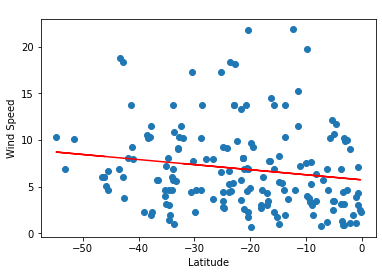

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,23))
